<h1 align="center">Sentiment Analysis of Tweets</h1>
<p align="center">────────── ✦ ──────────</p>
<p align="center"><b>Classifying tweets as Positive, Neutral, or Negative</b></p>

# 1] Import Required Libraries.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2] Load Dataset.

In [2]:
df = pd.read_csv("Sentiment140.csv", encoding='latin-1', header=None)

df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<div style="background-color:#FFF3CD; padding:10px; border-left:5px solid #FFC107;">
<strong>Important:</strong> Since Sentiment140 does not include column headers, <code>header=None</code> is used to prevent pandas from treating the first data row as column names.
</div>


In [3]:
# Dataset size before cleaning.
df.shape

(1600000, 6)

In [4]:
# name of the columns.
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [7]:
# Check missing values.
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [8]:
df.dtypes

target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object

## 4] DATA CLEANING

#### 4.1 Drop Unnecessary Columns.

In [9]:
df.drop(columns=['id','date','flag','user'],inplace=True)

## 5] Data Preprocessing.

In [10]:
# Import Required Libraries for Text Cleaning.

import re                                    # For regex (removing URLs, punctuation, numbers)
import nltk                                  # NLP library
from nltk.corpus import stopwords            # Stopword list
from nltk.tokenize import word_tokenize      # Tokenizer to split text
from nltk.stem import WordNetLemmatizer      # Lemmatizer

##### Tweets are noisy → we must clean them.

In [11]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)      # remove URLs
    text = re.sub(r"@\w+", "", text)         # remove mentions
    text = re.sub(r"#\w+", "", text)         # remove hashtags
    text = re.sub(r"[^a-z\s]", "", text)     # remove special chars
    return text

#Apply cleaning
df['clean_text'] = df['text'].apply(preprocess_text)

In [12]:
df[:5]

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


## 6] Exploratory Data Analysis (EDA)
    Understanding the data before modeling using statistics and visualizations.   

In [13]:
# Sentiment distribution
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

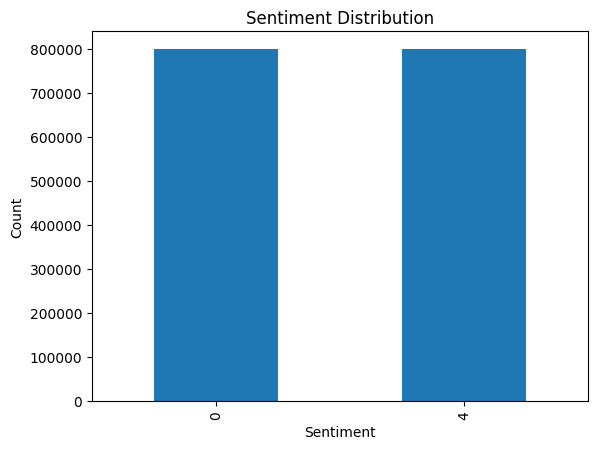

In [14]:
df['target'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

## 7] Split Data (Train & Test)

In [15]:
X = df['clean_text']
y = df['target']

In [16]:
X

0             awww thats a bummer  you shoulda got david ...
1          is upset that he cant update his facebook by t...
2           i dived many times for the ball managed to sa...
3            my whole body feels itchy and like its on fire 
4           no its not behaving at all im mad why am i he...
                                 ...                        
1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy th birthday to my boo of alll time tupac...
1599999                                           happy     
Name: clean_text, Length: 1600000, dtype: object

In [17]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1599995    4
1599996    4
1599997    4
1599998    4
1599999    4
Name: target, Length: 1600000, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1280000,) (320000,) (1280000,) (320000,)


## 8] Feature Engineering (Text → Numbers).

#### Convert text into numbers using TF-IDF.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## 9] Model Development.

> 🔍 **Model Choice:** Multinomial Naive Bayes is used because it is fast, scalable, and highly effective for sentiment analysis on large text datasets.


## Naive Bayes Classifier

In [20]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model.
nb = MultinomialNB()

In [21]:
# Train the model on the training data.
nb.fit(X_train_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [22]:
# Make predictions on the test data.
y_pred_nb = nb.predict(X_test_tfidf)
y_pred_nb

array([4, 4, 4, ..., 4, 0, 0], shape=(320000,))

## 10] Model Evaluation.

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

0.768784375
              precision    recall  f1-score   support

           0       0.76      0.78      0.77    159494
           4       0.78      0.76      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



## 11] Visualization & Insights.

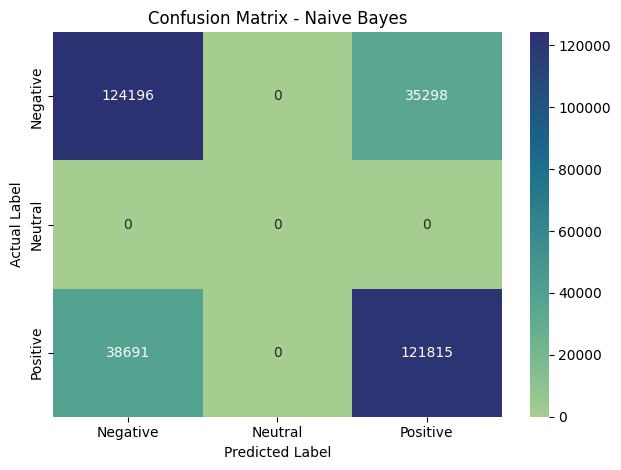

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = [0, 2, 4]
sentiment_labels = ['Negative', 'Neutral', 'Positive']

cm = confusion_matrix(y_test, y_pred_nb, labels=labels)

sns.heatmap(cm,annot=True,fmt='d',cmap='crest',xticklabels=sentiment_labels,yticklabels=sentiment_labels)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Naive Bayes")
plt.tight_layout()
plt.show()

<div style="background-color:#f9fafb; padding:12px; border-radius:6px; border:1px solid #e5e7eb;">
<b>Why a Second Model?</b><br>
After training the Naive Bayes classifier, an additional model was used to compare performance. This comparison helped identify the model that best fits the data and delivers improved accuracy.
</div>


## Logistic Regression.

In [25]:
from sklearn.linear_model import LogisticRegression

# Initialize the model.
lr = LogisticRegression(max_iter=1000)

In [26]:
# Train the model on the training data.
lr.fit(X_train_tfidf,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [27]:
# Make predictions on the test data.
y_pred_lr = lr.predict(X_test_tfidf)
y_pred_lr

array([4, 4, 4, ..., 4, 0, 0], shape=(320000,))

In [28]:
# Model Evalution.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

0.79016875
              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           4       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



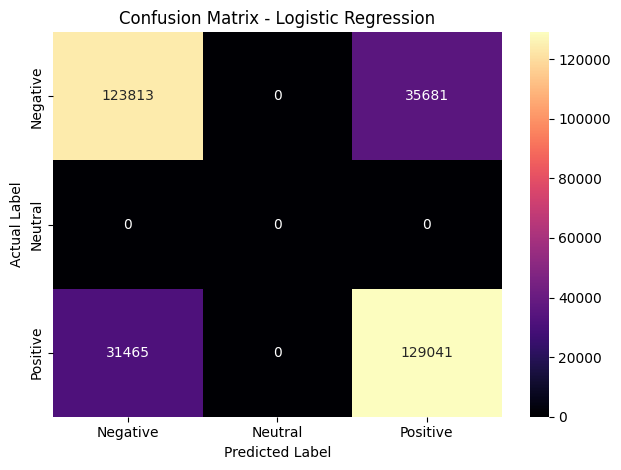

In [29]:
# Visualizations & Insights.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = [0, 2, 4]
sentiment_labels = ['Negative', 'Neutral', 'Positive']

cm = confusion_matrix(y_test, y_pred_lr, labels=labels)

sns.heatmap(cm,annot=True,fmt='d',cmap='magma',xticklabels=sentiment_labels,yticklabels=sentiment_labels)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

<div style="background-color:#f0f8ff; padding:12px; border-left:6px solid #1f77b4; font-size:16px;">
<b>Model Comparison Result:</b><br>
Naive Bayes achieved <b>76%</b> accuracy, while Logistic Regression performed better with <b>79%</b> accuracy. 
Therefore, <b>Logistic Regression</b> was selected as the final model.
</div>
